# PYTHON IMPLEMENTATION

# Problem Statement:
    
Avocado is a fruit consumed by people heavily in the United States. 

Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\ankus\Downloads\avocado.csv.zip")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
data.shape

(18249, 14)

In [3]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
#drop unwanted column
data=data.drop(['Unnamed: 0','Date'],axis=1)

In [7]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# label encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
data["type"]=le.fit_transform(data["type"])
data["region"]=le.fit_transform(data["region"])

In [10]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


# checking correlation

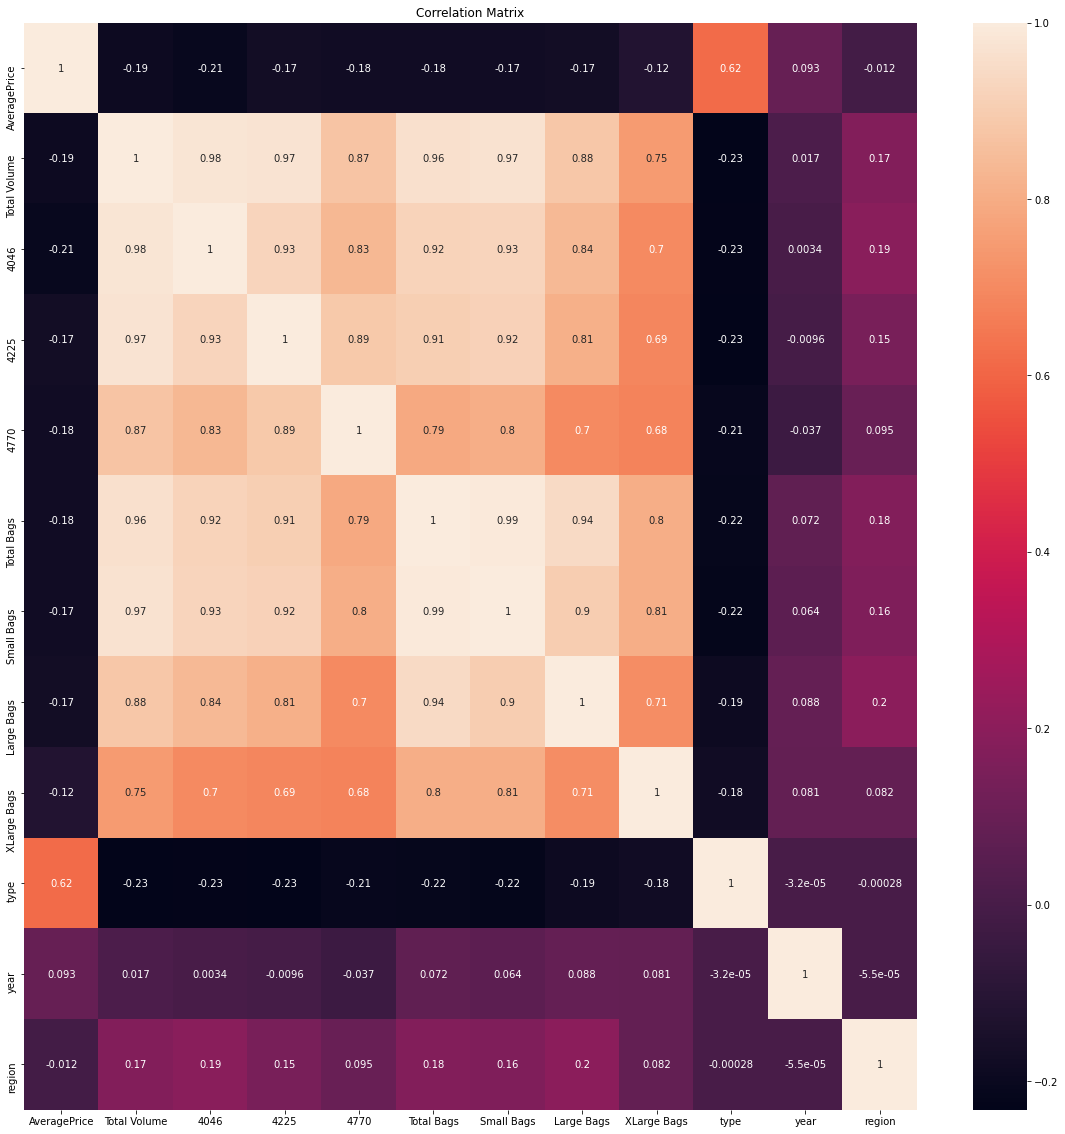

In [12]:
data.corr()
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=([20,20]))

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

some columns have correlation of more than 0.8, which means we can remove one of the columns

In [13]:
data=data.drop(['4225','Total Bags','Small Bags','Total Volume'],axis=1)

In [14]:
data

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,48.16,93.25,0.0,0,2015,0
1,1.35,674.28,58.33,97.49,0.0,0,2015,0
2,0.93,794.70,130.50,103.14,0.0,0,2015,0
3,1.08,1132.00,72.58,133.76,0.0,0,2015,0
4,1.28,941.48,75.78,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,0.00,431.85,0.0,1,2018,53
18245,1.71,1191.70,0.00,324.80,0.0,1,2018,53
18246,1.87,1191.92,727.94,42.31,0.0,1,2018,53
18247,1.93,1527.63,727.01,50.00,0.0,1,2018,53


In [15]:
corr_mat["region"].sort_values(ascending=False)


region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

now we can clearly identify the correlation of independent variable with target variable

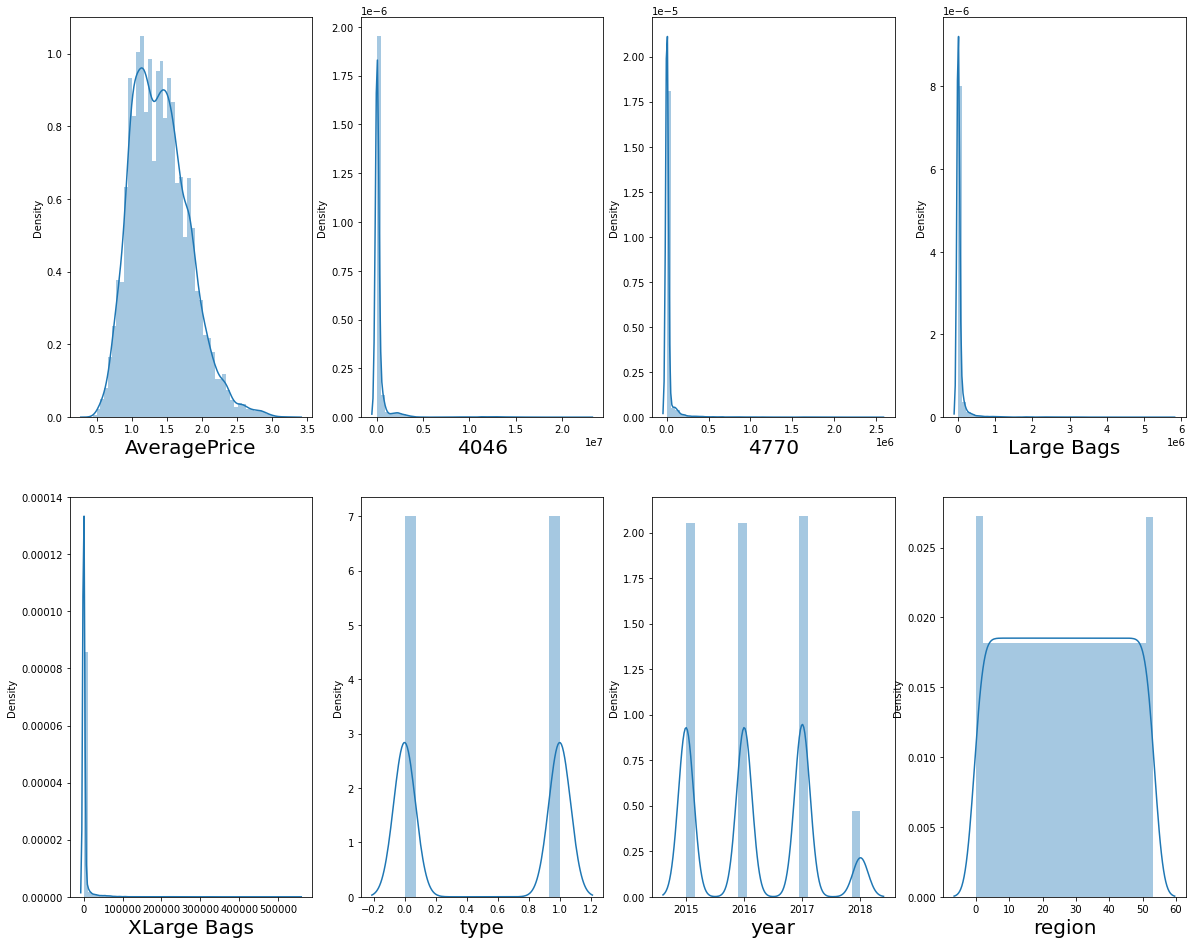

In [16]:
#let's see how data is distributed for every column
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()
        

data is looking skewed let proceed further to remove skewness using power_transform

In [17]:
#spliting data into independent and dependent variable
x=data.drop(['region'],axis=1)
y=data["region"]

In [18]:
x

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,year
0,1.33,1036.74,48.16,93.25,0.0,0,2015
1,1.35,674.28,58.33,97.49,0.0,0,2015
2,0.93,794.70,130.50,103.14,0.0,0,2015
3,1.08,1132.00,72.58,133.76,0.0,0,2015
4,1.28,941.48,75.78,197.69,0.0,0,2015
...,...,...,...,...,...,...,...
18244,1.63,2046.96,0.00,431.85,0.0,1,2018
18245,1.71,1191.70,0.00,324.80,0.0,1,2018
18246,1.87,1191.92,727.94,42.31,0.0,1,2018
18247,1.93,1527.63,727.01,50.00,0.0,1,2018


In [19]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [20]:
#checking skewness
x.skew().sort_values()

type             0.000329
year             0.215339
AveragePrice     0.580303
4046             8.648220
Large Bags       9.796455
4770            10.159396
XLarge Bags     13.139751
dtype: float64

columns are highly skewed let treat them with power transform

In [21]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [22]:
x

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,year
0,-0.086248,-0.658619,-0.247250,-0.773351,-0.699849,-0.999836,-1.221895
1,-0.034022,-0.776870,-0.201041,-0.763435,-0.699849,-0.999836,-1.221895
2,-1.273938,-0.731947,-0.007072,-0.750820,-0.699849,-0.999836,-1.221895
3,-0.793421,-0.634200,-0.148322,-0.691865,-0.699849,-0.999836,-1.221895
4,-0.219440,-0.685293,-0.137918,-0.600975,-0.699849,-0.999836,-1.221895
...,...,...,...,...,...,...,...
18244,0.640729,-0.467366,-1.238310,-0.410859,-0.699849,1.000164,1.968548
18245,0.816307,-0.619883,-1.238310,-0.481465,-0.699849,1.000164,1.968548
18246,1.147790,-0.619831,0.401546,-0.943486,-0.699849,1.000164,1.968548
18247,1.265876,-0.550282,0.401246,-0.908510,-0.699849,1.000164,1.968548


In [23]:
#validating that skewness has been removed or not
x.skew().sort_values()

Large Bags     -0.073809
4046           -0.022679
type            0.000329
AveragePrice    0.005596
4770            0.032184
year            0.213156
XLarge Bags     0.793520
dtype: float64

now we can see that skewness has been removed. now we are good to go

# checking outliers

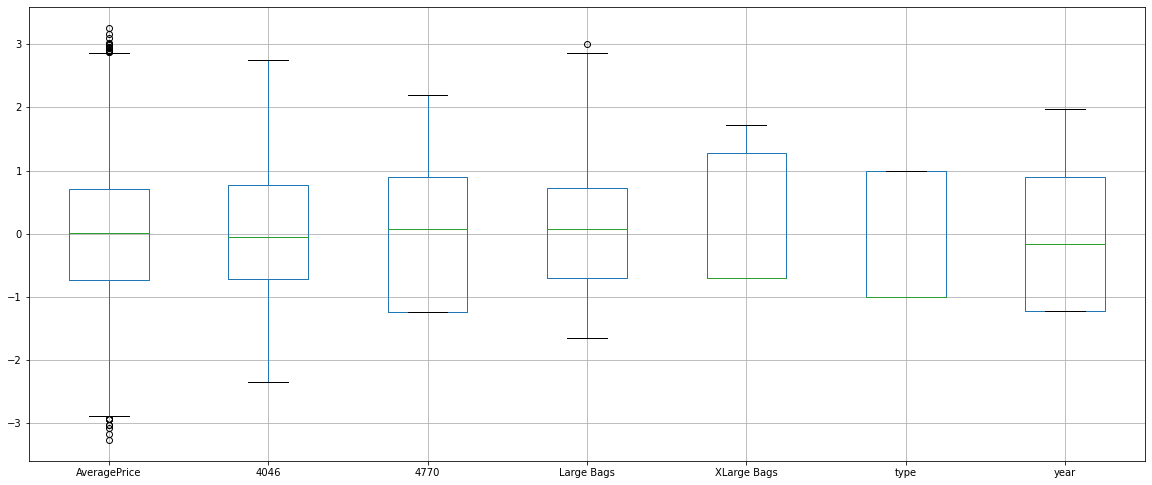

In [24]:
#plotting boxplot for columns
x.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

we can see outliers in a column so lets treat them

In [25]:
#find the IQR (inter quantile range) to identify outliers

#1St quantile
q1=data.quantile(0.25)

#3rd quantile
q3=data.quantile(0.75)

#IOR
iqr=q3-q1

In [26]:
q1

AveragePrice       1.10
4046             854.07
4770               0.00
Large Bags       127.47
XLarge Bags        0.00
type               0.00
year            2015.00
region            13.00
Name: 0.25, dtype: float64

In [27]:
q3

AveragePrice         1.66
4046            111020.20
4770              6243.42
Large Bags       22029.25
XLarge Bags        132.50
type                 1.00
year              2017.00
region              40.00
Name: 0.75, dtype: float64

In [28]:
iqr

AveragePrice         0.56
4046            110166.13
4770              6243.42
Large Bags       21901.78
XLarge Bags        132.50
type                 1.00
year                 2.00
region              27.00
dtype: float64

# OUTLIER DETECTION FORMULA

# higher side ==> Q3+(1.5*IQR)

# lower side ==> Q1-(1.5*IQR)

In [29]:
#validating one outlier

avgprice_high=(q3.AveragePrice+(1.5*iqr.AveragePrice))
avgprice_high

index=np.where(data['AveragePrice']>avgprice_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,year,region
0,0,1.33,1036.74,48.16,93.25,0.0,0,2015,0
1,1,1.35,674.28,58.33,97.49,0.0,0,2015,0
2,2,0.93,794.70,130.50,103.14,0.0,0,2015,0
3,3,1.08,1132.00,72.58,133.76,0.0,0,2015,0
4,4,1.28,941.48,75.78,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...
18035,18244,1.63,2046.96,0.00,431.85,0.0,1,2018,53
18036,18245,1.71,1191.70,0.00,324.80,0.0,1,2018,53
18037,18246,1.87,1191.92,727.94,42.31,0.0,1,2018,53
18038,18247,1.93,1527.63,727.01,50.00,0.0,1,2018,53


In [30]:
avgprice_low=(q3.AveragePrice-(1.5*iqr.AveragePrice))
avgprice_low

index=np.where(data['AveragePrice']<avgprice_low)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,year,region
0,0,1.33,1036.74,48.16,93.25,0.0,0,2015,0
1,1,1.35,674.28,58.33,97.49,0.0,0,2015,0
2,2,0.93,794.70,130.50,103.14,0.0,0,2015,0
3,3,1.08,1132.00,72.58,133.76,0.0,0,2015,0
4,4,1.28,941.48,75.78,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...
17141,18244,1.63,2046.96,0.00,431.85,0.0,1,2018,53
17142,18245,1.71,1191.70,0.00,324.80,0.0,1,2018,53
17143,18246,1.87,1191.92,727.94,42.31,0.0,1,2018,53
17144,18247,1.93,1527.63,727.01,50.00,0.0,1,2018,53


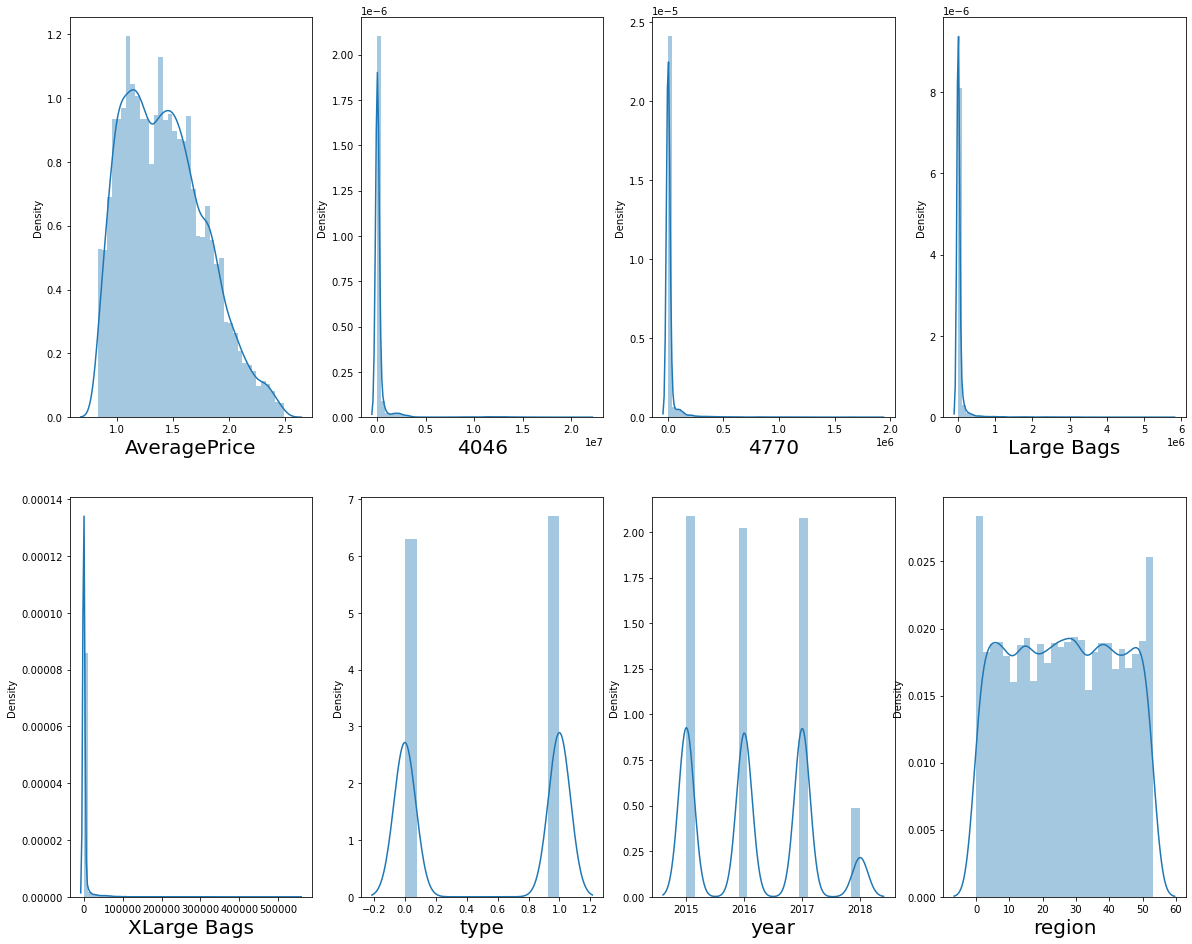

In [31]:
#lets plot the data now
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

before we fit our data to a model . let's visualize the relationship between our independent variables and the categories

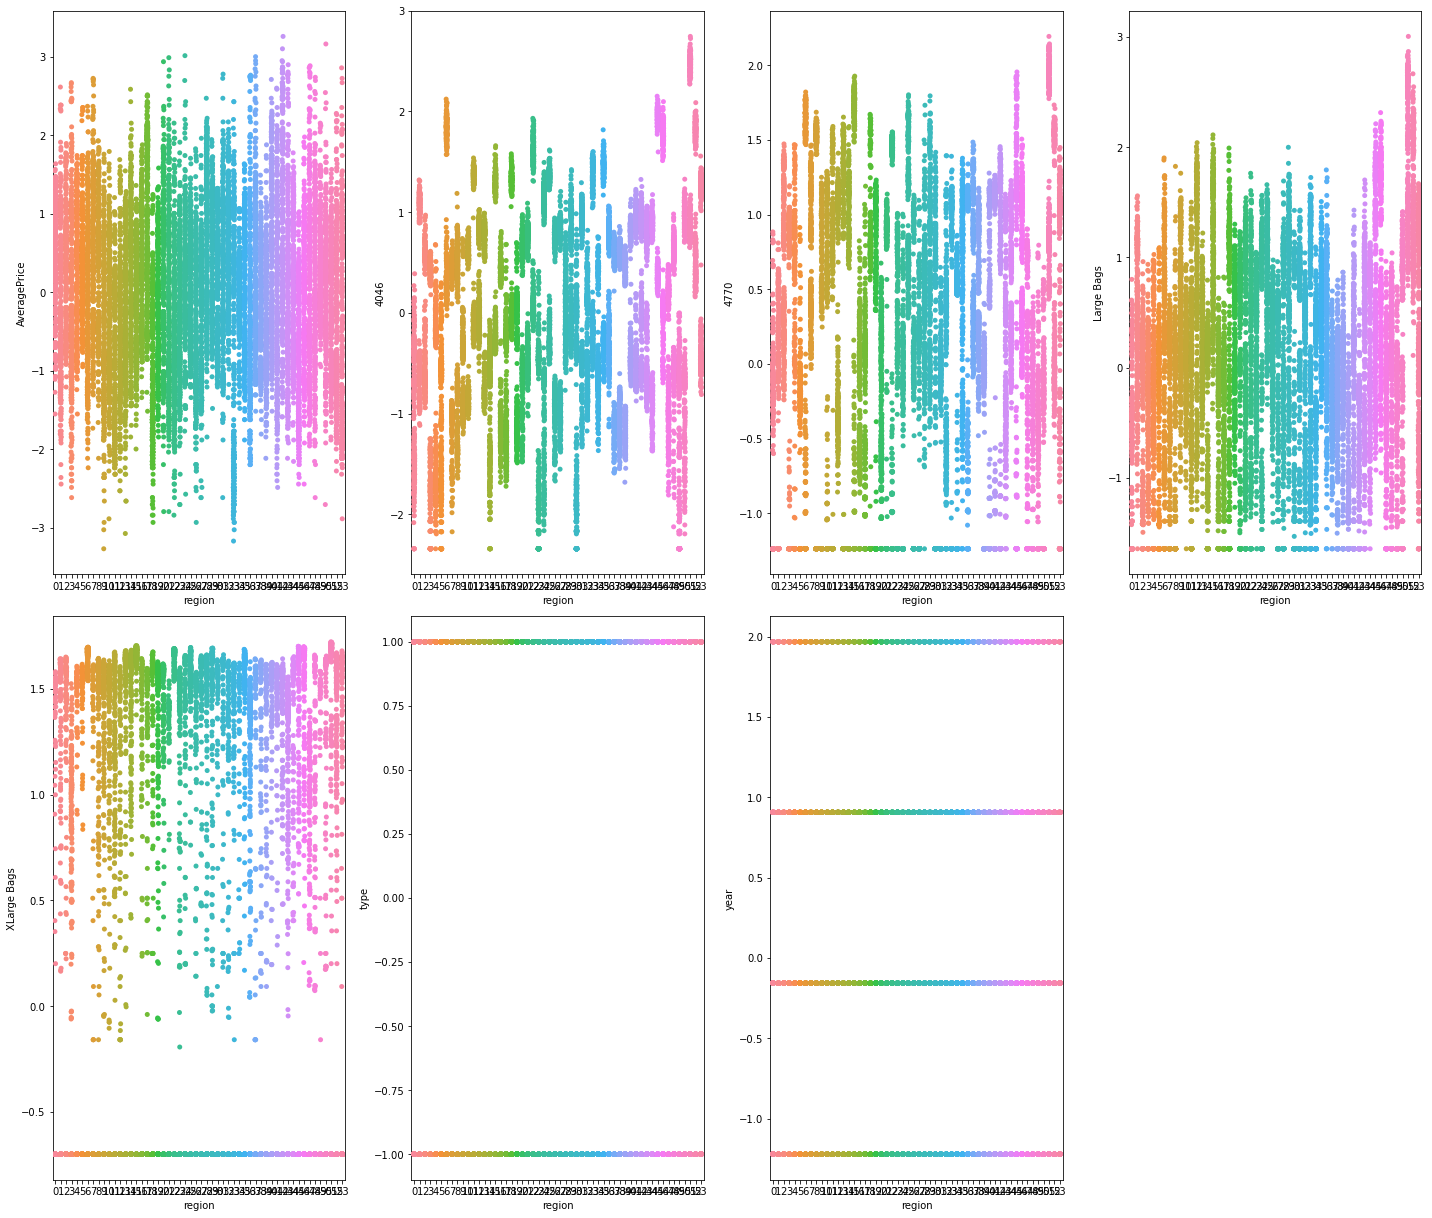

In [32]:
#let's see how features are related to class
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()


greta let's proceed by checking multicollinearity in the dependent variables. before that we should scale our data. let's use standard scalar for that

# Data Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [34]:
x_scaled

array([[-0.08624822, -0.65861896, -0.24725029, ..., -0.69984934,
        -0.99983562, -1.22187884],
       [-0.03402196, -0.77686953, -0.20104091, ..., -0.69984934,
        -0.99983562, -1.22187884],
       [-1.27393796, -0.73194656, -0.00707235, ..., -0.69984934,
        -0.99983562, -1.22187884],
       ...,
       [ 1.14779044, -0.61983119,  0.40154623, ..., -0.69984934,
         1.00016441,  1.96856389],
       [ 1.2658763 , -0.55028196,  0.40124602, ..., -0.69984934,
         1.00016441,  1.96856389],
       [ 0.61828746, -0.36790819,  0.12291887, ..., -0.69984934,
         1.00016441,  1.96856389]])

finding variance inflation factor in each scaled column i.e.  x_scaled[1](1/(1-R2))

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,1.861207,AveragePrice
1,3.065025,4046
2,3.517763,4770
3,1.995657,Large Bags
4,2.127059,XLarge Bags
5,3.674406,type
6,1.171092,year


now we can see that all the columns have volume less than 5 that means there is no multicollinearity

all the vif values are less than 5 and are very low. that means no multicollinearity. now, we can go ahead with fitting our data to the model. before that let's split our data in test and training set

# first building model for classification (for region)

# Training Process

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [37]:
#find best random state for train_test_split
maxAccu=0       #maximum accuracy
maxRS=0         #best random state

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on random_state",maxRS)

Best Accuracy is 0.33311417926802545 on random_state 93


now we have found best random state as 93.we will create our train_test_split using random_state

# creating train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=93)

In [39]:
x_train

array([[ 0.90155342,  0.044693  , -0.21191023, ..., -0.69984934,
         1.00016441,  1.96856389],
       [-1.51536367, -1.13775559, -1.23830962, ..., -0.69984934,
         1.00016441,  0.90686734],
       [ 0.85913583, -0.34419561, -0.3440405 , ..., -0.69984934,
         1.00016441,  0.90686734],
       ...,
       [ 1.51113103, -0.56880875, -1.23830962, ..., -0.69984934,
         1.00016441, -1.22187884],
       [ 1.47430248, -0.36694436, -1.23830962, ..., -0.69984934,
         1.00016441, -0.15660684],
       [-0.3844459 ,  0.45620769,  0.90395273, ..., -0.69984934,
        -0.99983562, -1.22187884]])

In [40]:
x_test

array([[ 1.36187228, -0.61289567, -0.77091408, ..., -0.69984934,
         1.00016441,  0.90686734],
       [ 1.47430248, -1.65524988, -1.23830962, ..., -0.69984934,
         1.00016441,  0.90686734],
       [ 0.9851812 ,  0.91700955,  0.92740033, ...,  1.61916551,
        -0.99983562,  0.90686734],
       ...,
       [ 1.18751119,  0.03247846, -1.23830962, ..., -0.69984934,
         1.00016441,  0.90686734],
       [ 1.30453196, -0.04486545,  0.39648121, ..., -0.69984934,
         1.00016441, -1.22187884],
       [-0.52650685,  0.94804971,  0.65126587, ...,  1.62801932,
        -0.99983562,  0.90686734]])

In [41]:
y_train

17960    29
16168    26
15554    15
10339    23
13867    37
         ..
7777     40
13464    29
11652    48
13659    33
2469     47
Name: region, Length: 13686, dtype: int32

In [42]:
y_test

16489    32
14984     4
7882     42
5327     48
11425    44
         ..
6605     18
17738    11
15708    18
11533    46
7975     44
Name: region, Length: 4563, dtype: int32

# LogisticRegression

In [43]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 33.31141792680255
[[29  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 92  0  0]
 [ 0  0  0 ...  3 78  0]
 [ 0  7  3 ...  0  0 11]]
              precision    recall  f1-score   support

           0       0.28      0.36      0.32        81
           1       0.22      0.58      0.32        76
           2       0.36      0.35      0.36        92
           3       0.22      0.13      0.16        79
           4       0.18      0.12      0.15        73
           5       0.19      0.19      0.19        80
           6       0.56      0.64      0.60        86
           7       0.47      0.59      0.52        87
           8       0.02      0.03      0.02        74
           9       0.45      0.59      0.51       100
          10       0.35      0.16      0.22        82
          11       0.40      0.48      0.44        90
          12       0.21      0.28      0.24        80
          13       0.21      0.19      0.20        77
      

# DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 63.70808678500987
[[35  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  3]
 [ 0  0 63 ...  0  0  0]
 ...
 [ 0  0  0 ... 91  0  0]
 [ 0  0  0 ...  2 80  0]
 [ 0  1  1 ...  0  0 33]]
              precision    recall  f1-score   support

           0       0.48      0.43      0.45        81
           1       0.56      0.54      0.55        76
           2       0.70      0.68      0.69        92
           3       0.51      0.57      0.54        79
           4       0.51      0.49      0.50        73
           5       0.45      0.53      0.48        80
           6       0.83      0.83      0.83        86
           7       0.80      0.80      0.80        87
           8       0.64      0.77      0.70        74
           9       0.69      0.61      0.65       100
          10       0.47      0.44      0.45        82
          11       0.70      0.63      0.66        90
          12       0.61      0.71      0.66        80
          13       0.62      0.64      0.63        77
      

# RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 76.11220688143764
[[52  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  1]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ... 92  0  0]
 [ 0  0  0 ...  1 86  0]
 [ 0  2  1 ...  0  0 51]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.65        81
           1       0.61      0.66      0.63        76
           2       0.87      0.79      0.83        92
           3       0.67      0.75      0.71        79
           4       0.65      0.62      0.63        73
           5       0.71      0.69      0.70        80
           6       0.90      0.88      0.89        86
           7       0.85      0.86      0.86        87
           8       0.74      0.82      0.78        74
           9       0.78      0.73      0.76       100
          10       0.51      0.59      0.54        82
          11       0.80      0.74      0.77        90
          12       0.74      0.88      0.80        80
          13       0.62      0.64      0.63        77
      

# SVC(Support vector classifier)

In [46]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 63.70808678500987
[[35  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  3]
 [ 0  0 63 ...  0  0  0]
 ...
 [ 0  0  0 ... 91  0  0]
 [ 0  0  0 ...  2 80  0]
 [ 0  1  1 ...  0  0 33]]
              precision    recall  f1-score   support

           0       0.48      0.43      0.45        81
           1       0.56      0.54      0.55        76
           2       0.70      0.68      0.69        92
           3       0.51      0.57      0.54        79
           4       0.51      0.49      0.50        73
           5       0.45      0.53      0.48        80
           6       0.83      0.83      0.83        86
           7       0.80      0.80      0.80        87
           8       0.64      0.77      0.70        74
           9       0.69      0.61      0.65       100
          10       0.47      0.44      0.45        82
          11       0.70      0.63      0.66        90
          12       0.61      0.71      0.66        80
          13       0.62      0.64      0.63        77
      

DecisionTreeClassifier ,RandomForestClassifier,SVC are producing good accuracy. now we will check cross validation score as well for overfitting

In [47]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x_scaled,y,cv=5)
print("Cross Validation Score of DecisionTree Model :",scr.mean()*100)

Cross Validation Score of DecisionTree Model : 40.3192227557184


In [48]:
scr2=cross_val_score(svc,x_scaled,y,cv=5)
print("Cross Validation Score ofSVC Model :",scr2.mean()*100)

Cross Validation Score ofSVC Model : 41.05339725276582


In [49]:
scr3=cross_val_score(rf,x_scaled,y,cv=5)
print("Cross Validation Score of Random Forest Model :",scr3.mean()*100)

Cross Validation Score of Random Forest Model : 49.33322171208475


 Random Forest Classifier is performing better among all so we will continue with Random Forest Classifier

# Hyper Parameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [51]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")


In [52]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [53]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.646285338593031

# now build the regression model (for average price)

In [11]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [12]:
#split the dependent and target variable
x=data.drop(['AveragePrice'],axis=1)
y=data["AveragePrice"]

In [13]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [14]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

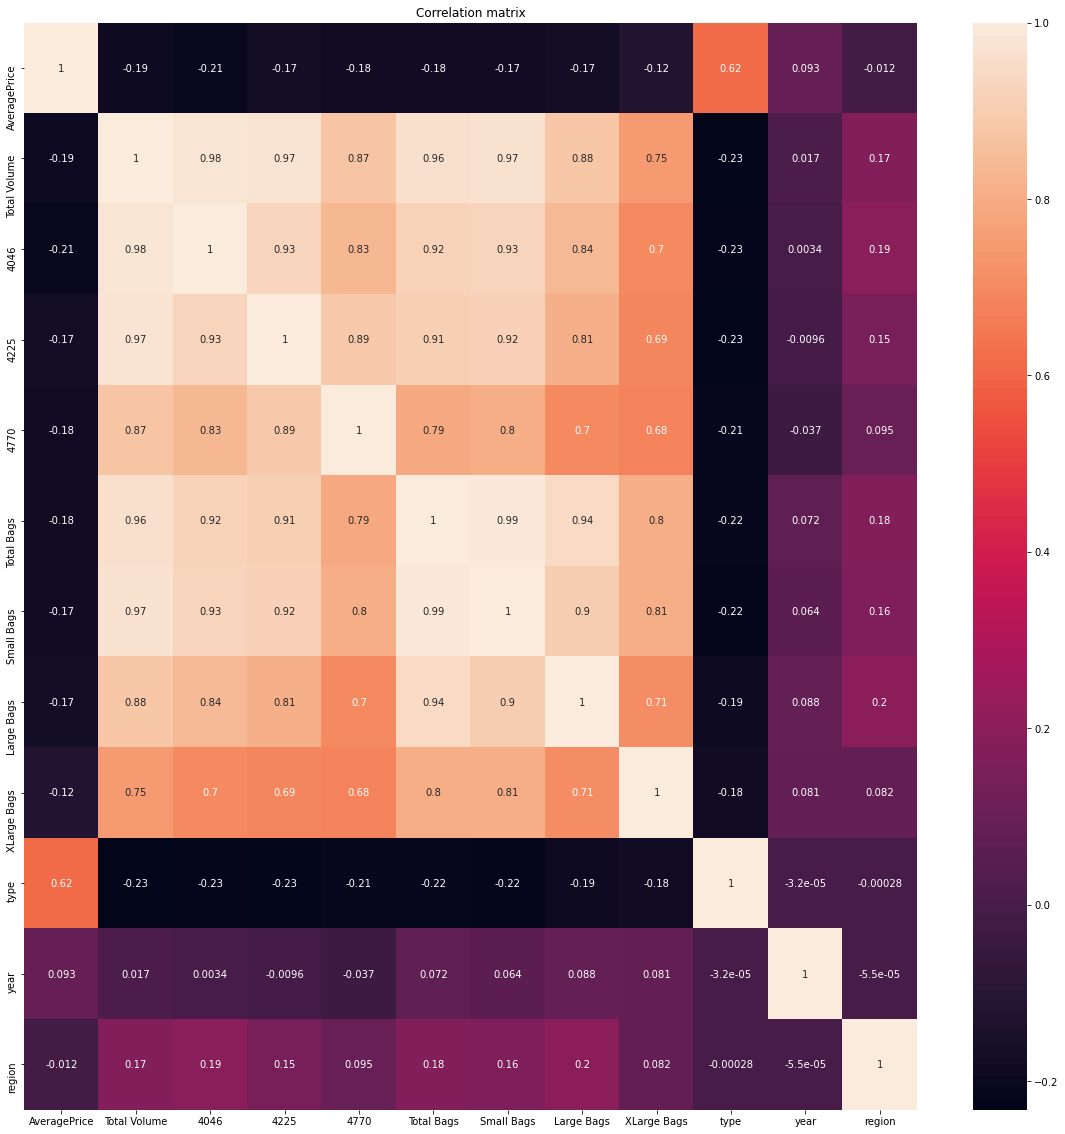

In [46]:
#let's visualize the relationship
data.corr()

corr_mat=data.corr()
#size of the canvas
plt.figure(figsize=[20,20])
#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation matrix")
plt.show()

some columns having high percentage of correlation with two other columns let drop that column

In [16]:
x=x.drop(["4046","Large Bags","Small Bags","Total Bags","4770","4225","4046"],axis=1)

In [17]:
x

,Total Volume,XLarge Bags,type,year,region
0,64236.62,0.0,0,2015,0
1,54876.98,0.0,0,2015,0
2,118220.22,0.0,0,2015,0
3,78992.15,0.0,0,2015,0
4,51039.60,0.0,0,2015,0
...,...,...,...,...,...
18244,17074.83,0.0,1,2018,53
18245,13888.04,0.0,1,2018,53
18246,13766.76,0.0,1,2018,53
18247,16205.22,0.0,1,2018,53


In [18]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


In [19]:
corr_mat=data.corr()
corr_mat["AveragePrice"].sort_values(ascending=False)

AveragePrice    1.000000
type            0.615845
year            0.093197
region         -0.011716
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

In [20]:
#checking skewness
x.skew().sort_values()

region           0.000030
type             0.000329
year             0.215339
Total Volume     9.007687
XLarge Bags     13.139751
dtype: float64

columns are highly skeweed. let's treat them using power transform

In [21]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [22]:
x

,Total Volume,XLarge Bags,type,year,region
0,-0.086605,-0.699849,-0.999836,-1.221895,-2.011552
1,-0.155746,-0.699849,-0.999836,-1.221895,-2.011552
2,0.179327,-0.699849,-0.999836,-1.221895,-2.011552
3,0.003876,-0.699849,-0.999836,-1.221895,-2.011552
4,-0.187640,-0.699849,-0.999836,-1.221895,-2.011552
...,...,...,...,...,...
18244,-0.674587,-0.699849,1.000164,1.968548,1.543838
18245,-0.767550,-0.699849,1.000164,1.968548,1.543838
18246,-0.771505,-0.699849,1.000164,1.968548,1.543838
18247,-0.698077,-0.699849,1.000164,1.968548,1.543838


In [23]:
#validating that skewness has been removed or not
x.skew().sort_values()

region         -0.261443
type            0.000329
Total Volume    0.011171
year            0.213156
XLarge Bags     0.793520
dtype: float64

now skewness has been removed let go ahead

# outliers check

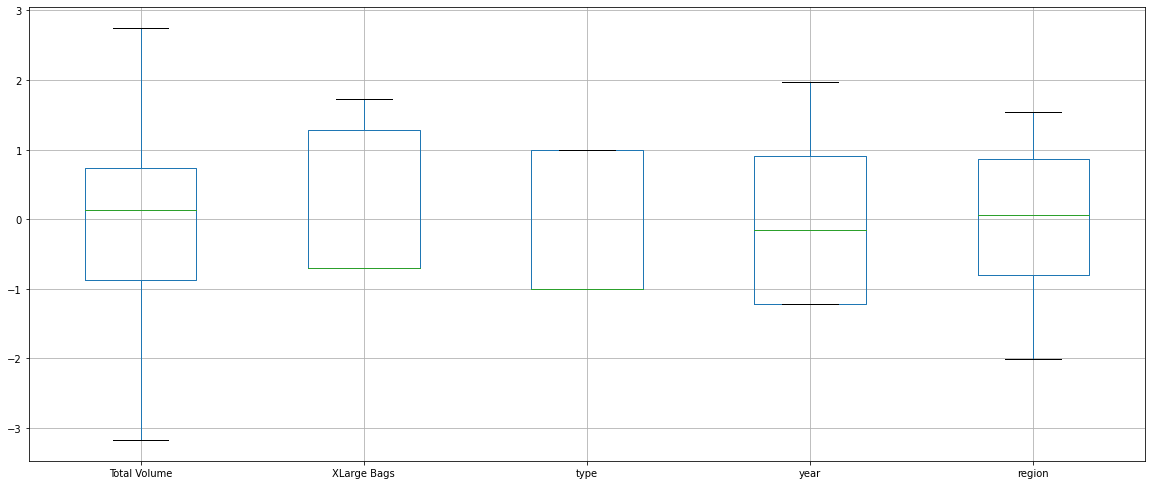

In [24]:
#plotting boxplot for outliers
x.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

there is only one outlier so lets proceed further

# Data Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [26]:
x_scaled

array([[-0.08660524, -0.69984934, -0.99983562, -1.22187884, -2.01155231],
       [-0.15574567, -0.69984934, -0.99983562, -1.22187884, -2.01155231],
       [ 0.17932662, -0.69984934, -0.99983562, -1.22187884, -2.01155231],
       ...,
       [-0.77150535, -0.69984934,  1.00016441,  1.96856389,  1.54383806],
       [-0.69807719, -0.69984934,  1.00016441,  1.96856389,  1.54383806],
       [-0.66380937, -0.69984934,  1.00016441,  1.96856389,  1.54383806]])

finding variance inflation factor in each scaled column i.e. x_scaled1

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,3.089596,Total Volume
1,2.045742,XLarge Bags
2,3.252235,type
3,1.062339,year
4,1.035094,region


let's go ahead and use linear regression and see how good it fits our data but the first lets split the data in train and test

In [28]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [29]:
#finding  best random state
maxAccu=0     #maximum accuracy
maxRS=0       #best random state value for which max accuracy is achieved

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is :",maxAccu,"on Random_state",maxRS)

Best Accuracy is : 0.4361552095108846 on Random_state 88


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=88)

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
#Ajusted r2 score
lr.score(x_train,y_train)

0.4116671991051981

let's check how well it fits the test data

In [34]:
lr.score(x_test,y_test)

0.4361552095108846

# Cross validation of the model

In [35]:
train_accuracy=lr.score(x_train,y_train)
test_accuracy=lr.score(x_test,y_test)


from sklearn.model_selection import cross_val_score,GridSearchCV
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.08612323279159237

# let's plot and visualize

In [36]:
y_pred=lr.predict(x_test)

In [37]:
y_pred

array([1.33068521, 1.47585619, 1.16196257, ..., 1.12383677, 1.16468413,
       1.45077135])

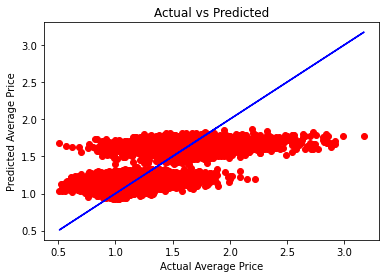

In [38]:
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price")
plt.ylabel("Predicted Average Price")
plt.title("Actual vs Predicted")
plt.show()

# Regularization

In [39]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [40]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training

0.0

In [41]:
lss=r2_score(y_test,pred_ls)
lss

-5.3477225915310456e-05

In [42]:
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100
    

8.612323279159236

# Ensemble Technique

In [43]:
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [44]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2_score :',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross_val_score :',rfc*100)

R2_score : 78.82104047501275
Cross_val_score : 4.2721153836692265


# conclusion

In [50]:
import pickle

In [54]:
#save file
filename='AVOCADO.pkl'
pickle.dump(rf,open(filename,'wb'))

In [55]:
loaded_model=pickle.load(open('AVOCADO.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

78.82104047501275


In [56]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Orignal","Predicted"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4553,4554,4555,4556,4557,4558,4559,4560,4561,4562
Orignal,1.6696,1.0078,1.0007,2.3353,1.2214,1.0747,1.6925,2.1232,1.5217,1.3971,...,2.3517,1.0608,0.848,1.3651,1.7409,1.2918,1.5264,1.0425,1.0682,1.2526
Predicted,1.6696,1.0078,1.0007,2.3353,1.2214,1.0747,1.6925,2.1232,1.5217,1.3971,...,2.3517,1.0608,0.848,1.3651,1.7409,1.2918,1.5264,1.0425,1.0682,1.2526
